In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

import sys
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf
import graph_funs as grf
import numerical_funs as nf
import general_funs as gef
import optics_funs as of
import finesse3_funs as f3f
import LCT_funs as lctf

import finesse
import finesse.ligo as aligo

import networkx as nx

In [151]:
aligo_kat = aligo.make_aligo()
aligo_kat.modes('off')
aligo_kat.parse('''
sgen DARMx LX.h
sgen DARMy LY.h phase=180
fsig(1)

qnoised noise OMC_OC.p3.o
qnoised NSR OMC_OC.p3.o nsr=true
pd pdo OMC_OC.p3.o
pd1 AS1 OMC_OC.p3.o f=&fsig
''')

In [149]:
xaxis = finesse.analysis.actions.Xaxis(aligo_kat.fsig.f, 'log', *[10, 500000, 310])
aligo_out = aligo_kat.run(xaxis)

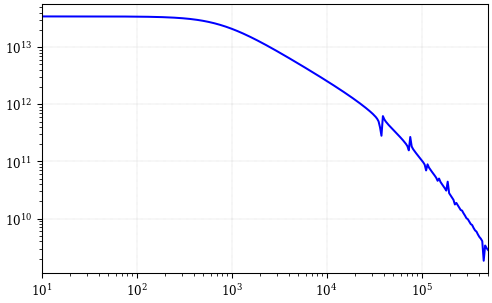

In [150]:
plt.loglog(aligo_out.x[0], np.abs(aligo_out['AS1']))

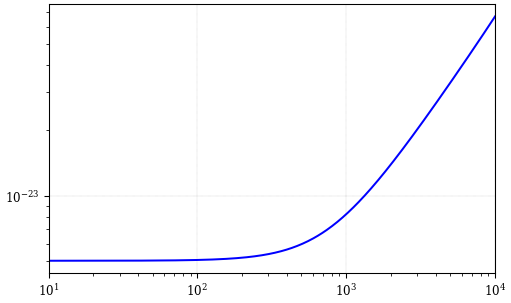

In [144]:
plt.loglog(aligo_out.x[0], np.abs(aligo_out['NSR']))

In [154]:
code = '''
laser L0 P=125
m PRM T=0.03 L=0 phi=90
link(L0.p1, PRM.p1)

bs BS R=0.5 T=0.5 alpha=45 phi=0
link(PRM.p2, BS.p1)

m ITMX T=0.014 L=0
m ITMY T=0.014 L=0
link(BS.p3, ITMX.p1)
link(BS.p2, ITMY.p1)

m ETMX R=1 L=0 phi=-10e-3
m ETMY R=1 L=0 phi=10e-3
s LX ITMX.p2 ETMX.p1 L=4e3
s LY ITMY.p2 ETMY.p1 L=4e3

m SRM T=0.35 L=0 phi=0
link(BS.p4, SRM.p1)

pd circ_x ETMY.p1.o
pd circ_y ETMX.p1.o

qnoised noise SRM.p2.o
qnoised NSR SRM.p2.o nsr=true
pd pdo SRM.p2.o
pd1 AS1 SRM.p2.o f=&fsig

sgen DARMx LX.h
sgen DARMy LY.h phase=180
fsig(1)
'''

steps = [10, 10000, 501]

kat = finesse.Model()
kat.parse(code)
xaxis = finesse.analysis.actions.Xaxis(kat.fsig.f, 'log', *steps)
# xaxis = finesse.analysis.actions.Xaxis(kat.PRM.phi, 'lin', *[0, 180, 310])
out = kat.run(xaxis)

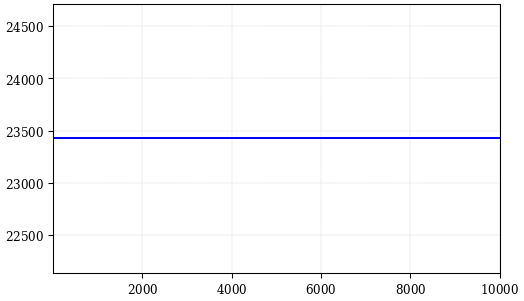

In [155]:
plt.plot(out.x[0], np.abs(out['circ_x']))

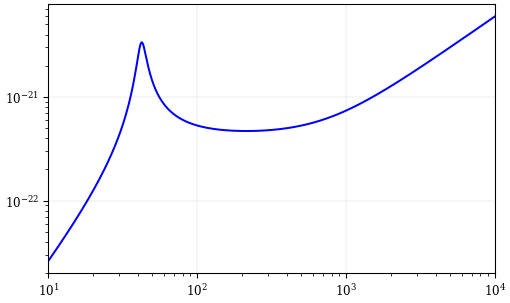

In [156]:
plt.loglog(out.x[0], np.abs(out['NSR']))

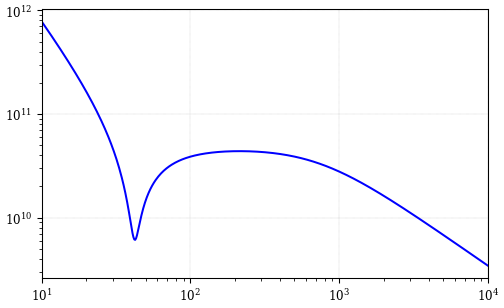

In [126]:
plt.loglog(out.x[0], np.abs(out['AS1']))